In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout, Flatten # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore # Corrected import
import matplotlib.pyplot as plt

In [14]:
# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
# Set the number of classes
num_classes = 10

In [16]:

# Reshape the dataset to add the channel dimension (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [17]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [18]:
# Normalize the image data to float32 values in the range [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

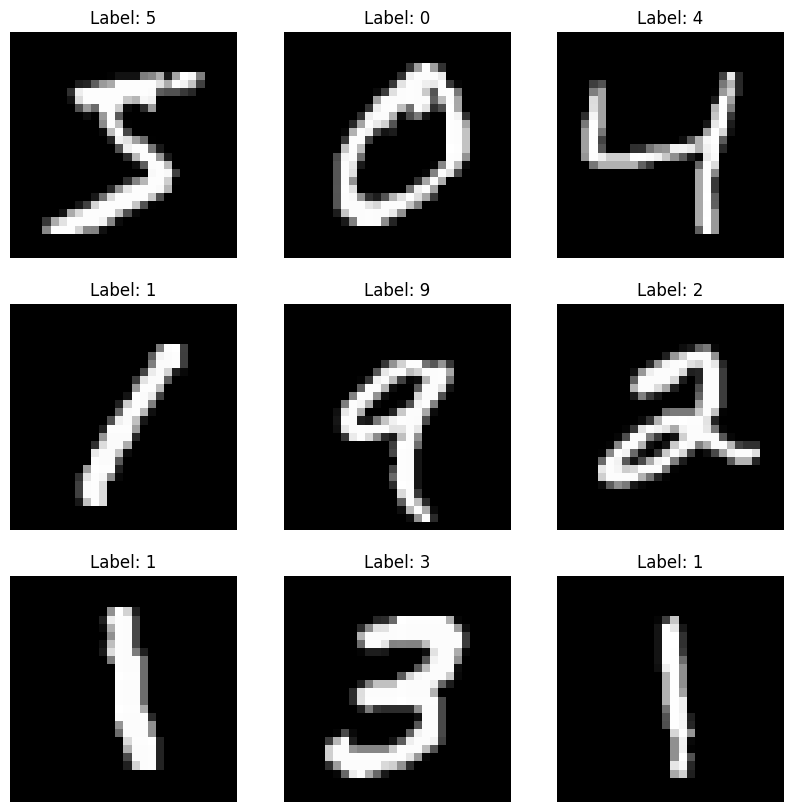

In [19]:
# Display a few sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.show()

In [20]:
# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,        # Randomly rotate images by 10 degrees
    width_shift_range=0.1,    # Shift images horizontally by 10%
    height_shift_range=0.1,   # Shift images vertically by 10%
    zoom_range=0.1,           # Random zoom on images
    shear_range=0.1           # Shear transformations
)

In [21]:
# Fit the ImageDataGenerator on the training data
datagen.fit(x_train)

In [22]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\smitz\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
# Train the model using augmented data
batch_size = 128
epochs = 10
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 155ms/step - accuracy: 0.7650 - loss: 0.7144 - val_accuracy: 0.9834 - val_loss: 0.0499
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.9491 - loss: 0.1672 - val_accuracy: 0.9884 - val_loss: 0.0314
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - accuracy: 0.9622 - loss: 0.1244 - val_accuracy: 0.9891 - val_loss: 0.0317
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.9694 - loss: 0.1025 - val_accuracy: 0.9912 - val_loss: 0.0259
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - accuracy: 0.9715 - loss: 0.0925 - val_accuracy: 0.9916 - val_loss: 0.0236
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - accuracy: 0.9751 - loss: 0.0823 - val_accuracy: 0.9907 - val_loss: 0.0261
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - accuracy: 0.9765 - loss: 0.0768 - val_accuracy: 0.9918 - val_loss: 0.0245
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 143ms/step - accuracy: 0.9773 - loss: 0

In [25]:
# Save the trained model
model.save('mnist_augmented.h5')

In [26]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.01890603080391884
Test accuracy: 0.9939000010490417


In [27]:
# Plot the accuracy and loss curves for training and validation
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

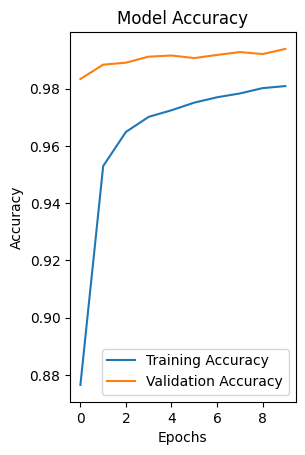

In [28]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


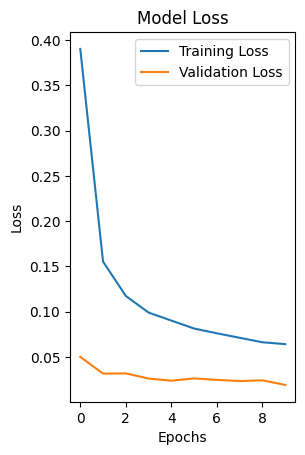

In [29]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [30]:
plt.show()